***
***
# 数据清洗之推特数据
***
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

## 数据清洗（data cleaning）
是数据分析的重要步骤，其主要目标是将混杂的数据清洗为可以被直接分析的数据，一般需要将数据转化为数据框（data frame）的样式。

本章将以推特文本的清洗作为例子，介绍数据清洗的基本逻辑。

- 清洗错误行
- 正确分列
- 提取所要分析的内容
- 介绍通过按行、chunk的方式对大规模数据进行预处理




# 1. 抽取tweets样本做实验
此节学生略过

In [4]:
bigfile = open('/Users/chengjun/百度云同步盘/Writing/OWS/ows-raw', 'rb')
chunkSize = 1000000
chunk = bigfile.readlines(chunkSize)
print len(chunk)

2752


In [5]:
print chunk[0]

"Twitter ID",Text,"Profile Image URL",Day,Hour,Minute,"Created At",Geo,"From User","From User ID",Language,"To User","To User ID",Source



In [23]:
bigfile = open('/Users/chengjun/百度云同步盘/Writing/OWS/ows-raw.txt', 'rb')
chunkSize = 1000000
chunk = bigfile.readlines(chunkSize)
print len(chunk)
with open("/Users/chengjun/GitHub/cjc/data/ows_tweets_sample.txt", 'w') as f:
    for i in chunk:
        f.write(i)  

2752


# 2. 清洗错行的情况

In [55]:
with open("/Users/chengjun/GitHub/cjc/data/ows_tweets_sample.txt", \
          'rb') as f:
    lines = f.readlines()

In [56]:
# 总行数
len(lines)

2752

In [57]:
# 查看第一行
lines[0]

'"Twitter ID",Text,"Profile Image URL",Day,Hour,Minute,"Created At",Geo,"From User","From User ID",Language,"To User","To User ID",Source\n'

# 问题： 第一行是变量名
> ## 1. 如何去掉换行符？
> ## 2. 如何获取每一个变量名？


In [5]:
varNames = lines[0].replace('\n', '').split(',')
varNames

['"Twitter ID"',
 'Text',
 '"Profile Image URL"',
 'Day',
 'Hour',
 'Minute',
 '"Created At"',
 'Geo',
 '"From User"',
 '"From User ID"',
 'Language',
 '"To User"',
 '"To User ID"',
 'Source']

In [17]:
len(varNames)

14

In [26]:
lines[1344]

'121818600490283009,"RT @chachiTHEgr8: RT @TheNewDeal: First they ignore you, then they laugh at you, then they fight you, then you win. - Gandhi #OccupyWallStreet #OWS #p2",http://a0.twimg.com/profile_images/326662126/Photo_233_normal.jpg,2011-10-06,5,26,"2011-10-06 05:26:32",N;,k_l_h_j,382233343,en,,0,"&lt;a href=&quot;http://twitter.com/#!/download/iphone&quot; rel=&quot;nofollow&quot;&gt;Twitter for iPhone&lt;/a&gt;"\n'

# 如何来处理错误换行情况？

In [6]:
with open("/Users/chengjun/GitHub/cjc/data/ows_tweets_sample_clean.txt", 'w') as f:
    right_line = '' # 正确的行，它是一个空字符串
    blocks = [] # 确认为正确的行会被添加到blocks里面
    for line in lines:
        right_line += line.replace('\n', ' ')
        line_length = len(right_line.split(','))
        if line_length >= 14:
            blocks.append(right_line)
            right_line = ''
    for i in blocks:
        f.write(i + '\n')

In [20]:
len(blocks)

2627

In [27]:
blocks[1344]

'121818879105310720,"RT @Min_Reyes: RT @The99Percenters: New video to go viral. From We Are Change\rhttp://t.co/6Ff718jk Listen to the guy begging... #ows #cdnpoli",http://a3.twimg.com/sticky/default_profile_images/default_profile_0_normal.png,2011-10-06,5,27,"2011-10-06 05:27:38",N;,MiyazakiMegu,260948518,en,,0,"&lt;a href=&quot;http://www.tweetdeck.com&quot; rel=&quot;nofollow&quot;&gt;TweetDeck&lt;/a&gt;"'

In [7]:
with open("/Users/chengjun/GitHub/cjc/data/ows_tweets_sample_clean4.txt", 'w') as f:
    right_line = '' # 正确的行，它是一个空字符串
    blocks = [] # 确认为正确的行会被添加到blocks里面
    for line in lines:
        right_line += line.replace('\n', ' ').replace('\r', ' ')
        line_length = len(right_line.split(','))
        if line_length >= 14:
            blocks.append(right_line)
            right_line = ''
    for i in blocks:
        f.write(i + '\n')

In [8]:
blocks[1344]

'121818879105310720,"RT @Min_Reyes: RT @The99Percenters: New video to go viral. From We Are Change http://t.co/6Ff718jk Listen to the guy begging... #ows #cdnpoli",http://a3.twimg.com/sticky/default_profile_images/default_profile_0_normal.png,2011-10-06,5,27,"2011-10-06 05:27:38",N;,MiyazakiMegu,260948518,en,,0,"&lt;a href=&quot;http://www.tweetdeck.com&quot; rel=&quot;nofollow&quot;&gt;TweetDeck&lt;/a&gt;" '

# 3. 读取数据、正确分列

In [1]:
# 提示：你可能需要修改以下路径名
with open("/Users/chengjun/GitHub/cjc/data/ows_tweets_sample_clean.txt", 'rb') as f:
    chunk = f.readlines()

In [10]:
len(chunk)

2627

In [3]:
chunk[:3]

['"Twitter ID",Text,"Profile Image URL",Day,Hour,Minute,"Created At",Geo,"From User","From User ID",Language,"To User","To User ID",Source\n',
 '121813144174727168,"RT @AnonKitsu: ALERT!!!!!!!!!!COPS ARE KETTLING PROTESTERS IN PARK W HELICOPTERS AND PADDYWAGONS!!!! #OCCUPYWALLSTREET #OWS #OCCUPYNY PLEASE RT !!HELP!!!!",http://a2.twimg.com/profile_images/1539375713/Twitter_normal.jpg,2011-10-06,5,4,"2011-10-06 05:04:51",N;,Anonops_Cop,401240477,en,,0,"&lt;a href=&quot;http://twitter.com/&quot;&gt;web&lt;/a&gt;"\n',
 '121813146137657344,"@jamiekilstein @allisonkilkenny Interesting interview (never aired, wonder why??) by Fox with #ows protester http://t.co/Fte55Kh7",http://a2.twimg.com/profile_images/1574715503/Kate6_normal.jpg,2011-10-06,5,4,"2011-10-06 05:04:51",N;,KittyHybrid,34532053,en,jamiekilstein,2149053,"&lt;a href=&quot;http://twitter.com/&quot;&gt;web&lt;/a&gt;"\n']

In [11]:
import csv
clean_lines = (line.replace('\x00','') \
               for line in chunk[1:])
lines = csv.reader(clean_lines, delimiter=',', \
                   quotechar='"') 

In [58]:
import pandas as pd

df = pd.read_csv("/Users/chengjun/GitHub/cjc/data/ows_tweets_sample_clean.txt",\
                 sep = ',', quotechar='"')
df[:3]

,Twitter ID,Text,Profile Image URL,Day,Hour,Minute,Created At,Geo,From User,From User ID,Language,To User,To User ID,Source
0,121813144174727168,RT @AnonKitsu: ALERT!!!!!!!!!!COPS ARE KETTLIN...,http://a2.twimg.com/profile_images/1539375713/...,2011-10-06,5,4,2011-10-06 05:04:51,N;,Anonops_Cop,401240477,en,NaN,0,&lt;a href=&quot;http://twitter.com/&quot;&gt;...
1,121813146137657344,@jamiekilstein @allisonkilkenny Interesting in...,http://a2.twimg.com/profile_images/1574715503/...,2011-10-06,5,4,2011-10-06 05:04:51,N;,KittyHybrid,34532053,en,jamiekilstein,2149053,&lt;a href=&quot;http://twitter.com/&quot;&gt;...
2,121813150000619521,@Seductivpancake Right! Those guys have a vict...,http://a1.twimg.com/profile_images/1241412831/...,2011-10-06,5,4,2011-10-06 05:04:52,N;,nerdsherpa,95067344,en,Seductivpancake,19695580,&lt;a href=&quot;http://www.echofon.com/&quot;...


In [36]:
df.Text[1]

'@jamiekilstein @allisonkilkenny Interesting interview (never aired, wonder why??) by Fox with #ows protester http://t.co/Fte55Kh7'

In [37]:
df['From User']

0           Anonops_Cop
1           KittyHybrid
2            nerdsherpa
3            hamudistan
4               kl_knox
5         vickycrampton
6        burgerbuilders
7              neverfox
8           davidgaliel
9               AnonOws
10           ryanjnagle
11              JanSKay
12         alyssa011968
13           fresh__air
14          fucentarmal
15                 msaf
16            Seekadoo2
17         Jay_in_Omaha
18       starshollowgzt
19            TopCat_TC
20      ElizabethBrossa
21           dpfournier
22         ReTweetAgain
23            Leoslaire
24           tommymiles
25              Perlins
26        SuzanneTwoTon
27             OccupySF
28              k_l_h_j
29              adpucci
             ...       
2596     DadaIsGalletas
2597              dvnix
2598        ilmestykset
2599           Amywhere
2600         EvanPokroy
2601          shaunasmo
2602             pishka
2603     portugaltheman
2604          RomperSTL
2605      hjertebraaten
2606            

# 4. 统计数量
### 统计发帖数量所对应的人数的分布
> 人数在发帖数量方面的分布情况

In [12]:
from collections import defaultdict
data_dict = defaultdict(int)
line_num = 0
lines = csv.reader((line.replace('\x00','') for line in chunk[1:]), delimiter=',', quotechar='"')
for i in lines:
    line_num +=1
    data_dict[i[8]] +=1 # i[8] 是user

In [13]:
data_dict.items()[:5]

[('Mike_EH_52', 1),
 ('neeirish', 1),
 ('heroofcamelot', 1),
 ('agentdarkapple', 1),
 ('KliphScurlock', 1)]

In [72]:
print line_num

2626


In [14]:
%matplotlib inline
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
matplotlib.rc("savefig", dpi=100)
font = FontProperties(fname=r'/Users/chengjun/github/cjc/data/msyh.ttf', size=14) # 注意：修改这里的路径名

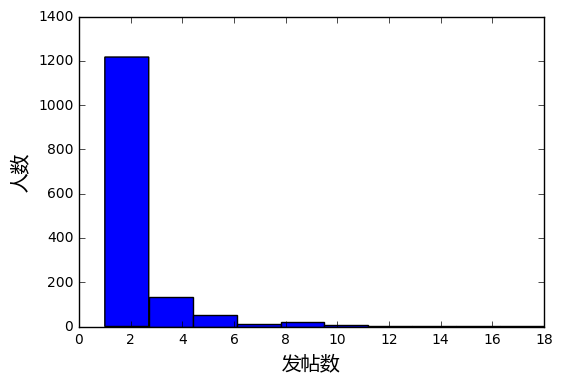

In [15]:
plt.hist(data_dict.values())
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(u'发帖数', fontproperties=font)
plt.ylabel(u'人数', fontproperties=font)
plt.show()

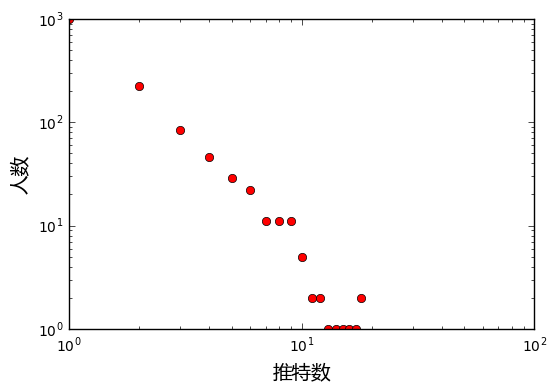

In [50]:
tweet_dict = defaultdict(int)
for i in data_dict.values():
    tweet_dict[i] += 1
 
plt.loglog(tweet_dict.keys(), tweet_dict.values(), 'ro',linewidth=2)  
plt.xlabel(u'推特数', fontproperties=font)
plt.ylabel(u'人数', fontproperties=font )
plt.show()

In [51]:
import numpy as np
import statsmodels.api as sm

def powerPlot(d_value, d_freq, color, marker):
    d_freq = [i + 1 for i in d_freq]
    d_prob = [float(i)/sum(d_freq) for i in d_freq]
    #d_rank = ss.rankdata(d_value).astype(int)
    x = np.log(d_value)
    y = np.log(d_prob)
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant,beta = res.params
    r2 = res.rsquared
    plt.plot(d_value, d_prob, linestyle = '',  color = color, marker = marker)
    plt.plot(d_value, np.exp(constant+x*beta),"red")
    plt.xscale('log'); plt.yscale('log')
    plt.text(max(d_value)/2,max(d_prob)/10,
             r'$\beta$ = ' + str(round(beta,2)) +'\n' + r'$R^2$ = ' + str(round(r2, 2)))

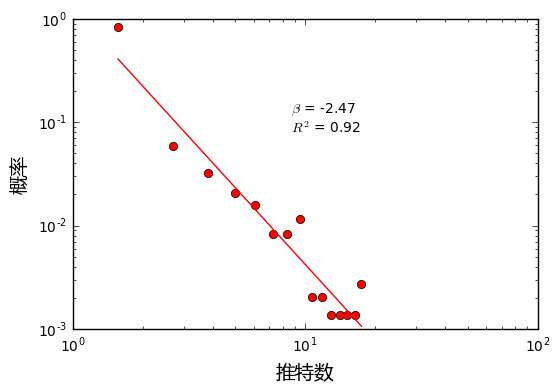

In [52]:
histo, bin_edges = np.histogram(data_dict.values(), 15)
bin_center = 0.5*(bin_edges[1:] + bin_edges[:-1])
powerPlot(bin_center,histo, 'r', 'o')
#lg=plt.legend(labels = [u'Tweets', u'Fit'], loc=3, fontsize=20)
plt.ylabel(u'概率', fontproperties=font)
plt.xlabel(u'推特数', fontproperties=font)
plt.show()

In [53]:
import statsmodels.api as sm
from collections import defaultdict
import numpy as np

def powerPlot(data):
    d = sorted(data, reverse = True )
    d_table = defaultdict(int)
    for k in d:
        d_table[k] += 1
    d_value = sorted(d_table)
    d_value = [i+1 for i in d_value]
    d_freq = [d_table[i]+1 for i in d_value]
    d_prob = [float(i)/sum(d_freq) for i in d_freq]
    #d_rank = ss.rankdata(d_value).astype(int)
    x = np.log(d_value)
    y = np.log(d_prob)
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant,beta = res.params
    r2 = res.rsquared
    plt.plot(d_value, d_prob, 'ro')
    plt.plot(d_value, np.exp(constant+x*beta),"red")
    plt.xscale('log'); plt.yscale('log')
    plt.text(max(d_value)/2,max(d_prob)/5,
             'Beta = ' + str(round(beta,2)) +'\n' + 'R squared = ' + str(round(r2, 2)))
    plt.title('Distribution')
    plt.ylabel('P(K)')
    plt.xlabel('K')
    plt.show()
    

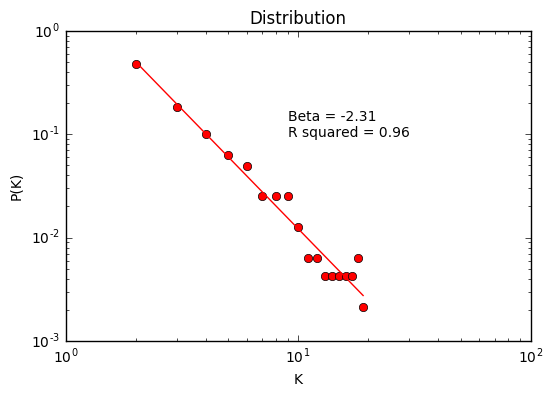

In [54]:
powerPlot(data_dict.values())

In [53]:
import powerlaw
def plotPowerlaw(data,ax,col,xlab):
    fit = powerlaw.Fit(data,xmin=2)
    #fit = powerlaw.Fit(data)
    fit.plot_pdf(color = col, linewidth = 2)
    a,x = (fit.power_law.alpha,fit.power_law.xmin)
    fit.power_law.plot_pdf(color = col, linestyle = 'dotted', ax = ax, \
                            label = r"$\alpha = %d \:\:, x_{min} = %d$" % (a,x))
    ax.set_xlabel(xlab, fontsize = 20)
    ax.set_ylabel('$Probability$', fontsize = 20)
    plt.legend(loc = 0, frameon = False)

In [49]:
from collections import defaultdict
data_dict = defaultdict(int)

for i in df['From User']:
    data_dict[i] += 1

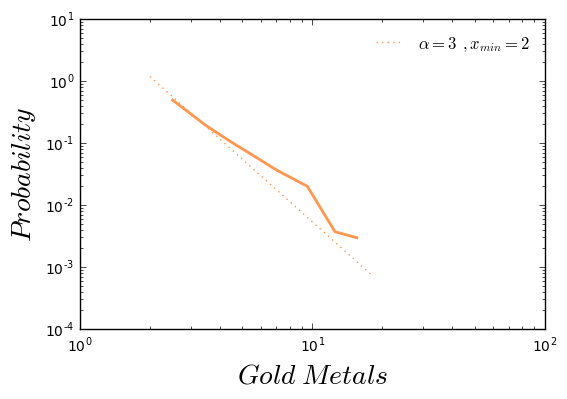

In [54]:
import matplotlib.cm as cm
cmap = cm.get_cmap('rainbow_r',6)

fig = plt.figure(figsize=(6, 4),facecolor='white')
ax = fig.add_subplot(1, 1, 1)
plotPowerlaw(data_dict.values(), ax,cmap(1), '$Gold\;Metals$')

# 5. 清洗tweets文本

In [60]:
tweet = '''RT @AnonKitsu: ALERT!!!!!!!!!!COPS ARE KETTLING PROTESTERS IN PARK W HELICOPTERS AND PADDYWAGONS!!!! 
            #OCCUPYWALLSTREET #OWS #OCCUPYNY PLEASE @chengjun @mili http://computational-communication.com 
            http://ccc.nju.edu.cn RT !!HELP!!!!'''

In [61]:
import re

import twitter_text


# 安装twitter_text
> ## pip install twitter-text-py


# 无法正常安装的同学
## 可以在spyder中打开terminal安装

In [16]:
import re

tweet = '''RT @AnonKitsu: ALERT!!!!!!!!!!COPS ARE KETTLING PROTESTERS IN PARK W HELICOPTERS AND PADDYWAGONS!!!! 
            #OCCUPYWALLSTREET #OWS #OCCUPYNY PLEASE @chengjun @mili http://computational-communication.com 
            http://ccc.nju.edu.cn RT !!HELP!!!!'''

rt_patterns = re.compile(r"(RT|via)((?:\b\W*@\w+)+)", \
                         re.IGNORECASE)
rt_user_name = rt_patterns.findall(tweet)[0][1].strip(' @')
rt_user_name

'AnonKitsu'

In [35]:
import re

tweet = '''@AnonKitsu: ALERT!!!!!!!!!!COPS ARE KETTLING PROTESTERS IN PARK W HELICOPTERS AND PADDYWAGONS!!!! 
            #OCCUPYWALLSTREET #OWS #OCCUPYNY PLEASE @chengjun @mili http://computational-communication.com 
            http://ccc.nju.edu.cn RT !!HELP!!!!'''

rt_patterns = re.compile(r"(RT|via)((?:\b\W*@\w+)+)", re.IGNORECASE)
rt_user_name = rt_patterns.findall(tweet)
print rt_user_name

if rt_user_name:
    print 'it exits.'
else:
    print 'None'

[]
None


In [24]:
import re

def extract_rt_user(tweet):
    rt_patterns = re.compile(r"(RT|via)((?:\b\W*@\w+)+)", re.IGNORECASE)
    rt_user_name = rt_patterns.findall(tweet)
    if rt_user_name:
        rt_user_name = rt_user_name[0][1].strip(' @')
    else:
        rt_user_name = None
    return rt_user_name

In [38]:
tweet = '''@AnonKitsu: ALERT!!!!!!!!!!COPS ARE KETTLING PROTESTERS IN PARK W HELICOPTERS AND PADDYWAGONS!!!! 
            #OCCUPYWALLSTREET #OWS #OCCUPYNY PLEASE @chengjun @mili http://computational-communication.com 
            http://ccc.nju.edu.cn RT !!HELP!!!!'''

print extract_rt_user(tweet)    

None


# 获得清洗过的推特文本

不含人名、url、各种符号（如RT @等）

In [21]:
def extract_tweet_text(tweet, at_names, urls):
    for i in at_names:
        tweet = tweet.replace(i, '')
    for j in urls:
        tweet = tweet.replace(j, '')
    marks = ['RT @', '@', '&quot;', '#', '\n', '\t', '  ']
    for k in marks:
        tweet = tweet.replace(k, '')
    return tweet

In [25]:
import twitter_text

tweet = '''RT @AnonKitsu: ALERT!!!!!!!!!!COPS ARE KETTLING PROTESTERS IN PARK W HELICOPTERS AND PADDYWAGONS!!!! 
            #OCCUPYWALLSTREET #OWS #OCCUPYNY PLEASE @chengjun @mili http://computational-communication.com 
            http://ccc.nju.edu.cn RT !!HELP!!!!'''

ex = twitter_text.Extractor(tweet)
at_names = ex.extract_mentioned_screen_names()
urls = ex.extract_urls()
hashtags = ex.extract_hashtags()
rt_user = extract_rt_user(tweet)
tweet_text = extract_tweet_text(tweet, at_names, urls)

print at_names, urls, hashtags, rt_user,'-------->', tweet_text

[u'AnonKitsu', u'chengjun', u'mili'] [u'http://computational-communication.com', u'http://ccc.nju.edu.cn'] [u'OCCUPYWALLSTREET', u'OWS', u'OCCUPYNY'] AnonKitsu --------> : ALERT!!!!!!!!!!COPS ARE KETTLING PROTESTERS IN PARK W HELICOPTERS AND PADDYWAGONS!!!! OCCUPYWALLSTREET OWS OCCUPYNY PLEASE RT !!HELP!!!!


In [26]:
import csv

lines = csv.reader((line.replace('\x00','') for line in chunk[1:]), delimiter=',', quotechar='"')
tweets = [i[1] for i in lines]

In [27]:
for tweet in tweets[:5]:
    ex = twitter_text.Extractor(tweet)
    at_names = ex.extract_mentioned_screen_names()
    urls = ex.extract_urls()
    hashtags = ex.extract_hashtags()
    rt_user = extract_rt_user(tweet)
    tweet_text = extract_tweet_text(tweet, at_names, urls)

    print at_names, urls, hashtags, rt_user, 
    print tweet_text

[u'AnonKitsu'] [] [u'OCCUPYWALLSTREET', u'OWS', u'OCCUPYNY'] AnonKitsu : ALERT!!!!!!!!!!COPS ARE KETTLING PROTESTERS IN PARK W HELICOPTERS AND PADDYWAGONS!!!! OCCUPYWALLSTREET OWS OCCUPYNY PLEASE RT !!HELP!!!!
[u'jamiekilstein', u'allisonkilkenny'] [u'http://t.co/Fte55Kh7'] [u'ows'] None Interesting interview (never aired, wonder why??) by Fox with ows protester 
[u'Seductivpancake'] [] [u'ows'] None  Right! Those guys have a victory condition: regime change. ows doesn't seem to have a goal I can figure out.
[u'bembel'] [u'http://j.mp/rhHavq'] [u'OccupyWallStreet', u'OWS'] bembel  Occupy Wall Street als linke Antwort auf die Tea Party?OccupyWallStreet OWS
[] [] [u'ows'] None ows White shirt= Brown shirt.


# 思考：

### 提取出tweets中的rtuser与user的转发网络

## 格式：
rt_user1, user1

rt_user2, user3

rt_user2, user4

...

数据保存为csv格式

In [28]:
import csv

lines = csv.reader((line.replace('\x00','') \
                    for line in chunk[1:]), \
                   delimiter=',', quotechar='"')
tweet_user_data = [(i[1], i[8]) for i in lines]
for tweet,user in tweet_user_data:
    rt_user = extract_rt_user(tweet)
    if rt_user:
        print rt_user, ',', user

AnonKitsu , Anonops_Cop
bembel , hamudistan
TheNewDeal , vickycrampton
ForseenUnNamed , AnonOws
tinadupuy , ryanjnagle
UnderdogLib , JanSKay
anonops , msaf
OccupyWallSt , Seekadoo2
TheNewDeal , Jay_in_Omaha
KevDGrussing , starshollowgzt
LJSearles , TopCat_TC
OccupyMainSt , ElizabethBrossa
BlueDuPage , dpfournier
OpWallStreet , ReTweetAgain
Anon_is_you: @AnonyOps , tommymiles
TheNewDeal , Perlins
OccupySF , SuzanneTwoTon
MMFlint , adpucci
OccupySF , subiepick
OccupySF , Tawanda46
TrueGilby , RowleyGirl_4
Titleixbaby , starshollowgzt
neverfox , yelbley
raypride , Beelzebjorn
kittylight , dove_hawk
AnonymousIRC , dctwice
OccupySF , JorgexMA
TheNewDeal , LeftSlashRight
BABYDIABOLICAL , WeCanBeatEczema
Spudlovr , 2foodie
kittylight , dove_hawk
OccupySF , AnnaLovesBooks
diceylee808 , Tawanda46
kittylight , dove_hawk
LyndsayFarlow , WhatMattersNews
OccupySF , JonusMiles
kittylight , dove_hawk
Beelzebjorn , JorgexMA
kittylight , dove_hawk
consciouslibert , CitizenWorm
BlueDuPage , GreeGreece
a

# 阅读文献